In [83]:
%pylab inline

import pandas as pd
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [84]:
data = pd.read_csv('../log/memoryLog.csv', comment='#')
data

,agent,time,news0,news1,news2,news3,news4
0,0.0,1.0,5815852694ec81d2,0,0,0.0,0.0
1,1.0,1.0,e0c7f6412ef329af,0,0,0.0,0.0
2,2.0,1.0,64295dc49e9a0b5f,0,0,0.0,0.0
3,3.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4.0,1.0,0.0,0.0,0.0,0.0,0.0
5,5.0,1.0,0.0,0.0,0.0,0.0,0.0
6,6.0,1.0,0.0,0.0,0.0,0.0,0.0
7,7.0,1.0,0.0,0.0,0.0,0.0,0.0
8,8.0,1.0,0.0,0.0,0.0,0.0,0.0
9,9.0,1.0,0.0,0.0,0.0,0.0,0.0


In [93]:
maxTimeIteration = data.max()['time']
maxTimeIteration

20.0

In [113]:
maxUsers = data.max()['agent']
maxUsers

102.0

In [87]:
cuttedData = data.drop('agent', 1)
lt = list(cuttedData)
lt

['time', 'news0', 'news1', 'news2', 'news3', 'news4']

In [91]:
listNews = []
ln = lt[1:]
for i in range(len(ln)):
    listNews = append(listNews, data.groupby(ln[i]).nunique().index.tolist()) #counts all news
listNews = list(set(listNews)) # removes duplicates
listNews

['5815852694ec81d2', '0', '64295dc49e9a0b5f', '0.0', 'e0c7f6412ef329af']

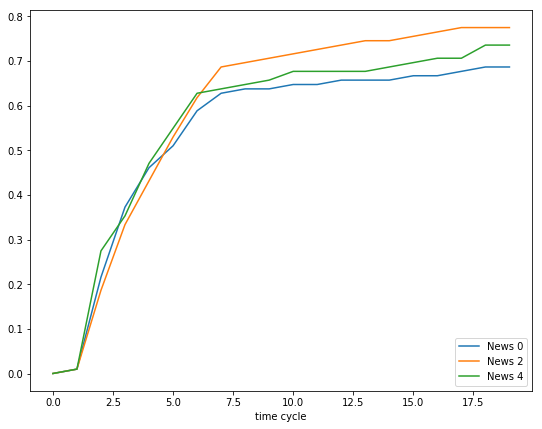

In [114]:
for ii, news in enumerate(listNews):
    if news == str(0) or news == str(0.0):
        continue
    arr = np.empty([0])
    for time in range(int(maxTimeIteration)):
        cuttedSingleData = cuttedData.loc[cuttedData['time'] ==  time]
        counter = 0
        for index, row in cuttedSingleData.iterrows():
            if (row[ln] == news).any():
                counter = counter + 1
        arr = np.append(arr, counter)
    arr = arr / maxUsers
    xlabel('time cycle')
    ylabel('')
    figsize(9,7)
    plot(arr, label='News %s' % ii)
    legend(loc='lower right')

In [100]:
arr

array([ 75.])